# NFPA-CBA Example 3 : Government office (GOV)

## Notebook initialization

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

## Introduction
This Notebook presents an example application of the prototype methodology for cost-benefit analysis. This case study considers a governmental office building area of 6000 m2 (6 floors of 1000 m2 each), inspired by the case study in (Yung et al., 1997). The cost-benefit of the following fire protection systems is investigated: (i) advanced automatic detection system, and (ii) extra staircase.  

The case study is envisioned as an early-stage cost-benefit evaluation based on statistical data and expert judgement (supplemented with parameter studies). This allows to assess whether the information provided by detailed fire development and evacuation models can reasonably influence the decision-making. If a simplified assessment based on expert judgement clearly indicates that an investment is, or is not, cost-effective, then further detailed analyses do not add value.

The reference design has only basic fire detection. The cost-benefit of three design alternatives are investigated: (a) presence of advanced detection system; (b) presence of an additional staircase; (c) presence of both an advanced detection system and an additional staircase.  

The benefit evaluation is done considering the event tree diagram visualized below. Three scenarios are identified: (I) No detection system warning; (II) Detection system warning, no occupant suppression; (III) Detection system warning and suppression by occupants. The fire frequency considers reported fires, and thus already includes occupant detection and early stage suppression.

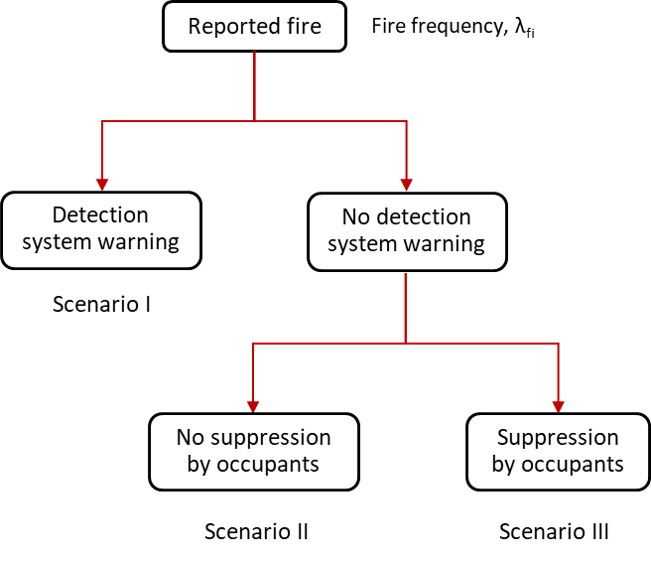

## I. Input
User input in this area.
Note: All monetary values in 2022 USD

### I.1 Building characteristics
Six story government office building (6000m2 total floor area). Concrete moment frame.  
Cost evaluation of structure and the cost of fire protection measures considering (RSMeans 2022), see background document.  

The additional staircase is considered not to increase the total construction cost, as the total floor area is constant.  
The additional staircase however results in a loss of usable floorspace.

In [2]:
S_area = 6000 # [m2] Total floor area
Construction_Cost = 3903 # [USD/m2] Construction cost; 3908 (RSMeans, 2022)
DemolAndDisp_cost = 0.03*Construction_Cost # [USD/m2] Demolition and disposal cost; assessessed as 3% of construction cost, informed by case 1

### I.2 Discount rate and obsolescence rate

In [3]:
g = 0.03 # [1/year] continuous discount rate; 3% based on (Fischer, 2014)
o = 0    # [1/year] obsolescence rate; 0% - building obsolescence neglected

### I.3 Cost of fire protection

#### I.3.a Investment cost fire protection

In [4]:
## detection system
c_det_unit_full=10.33+9.47 # [USD/m2] System installation cost; 10.33 for detectors, 9.47 for fire alarm command sensor and voice alarm (RSMeans, 2022)
c_det_unit=c_det_unit_full-4 # [USD/m2] Additional cost over reference (minus 4 USD/m2 based on case 1 and case 2)
c_det = c_det_unit*S_area  # [USD] Total system installation cost

## staircase
c_sc = 0 # [USD] Installation cost staircase; 0 as cost included in total building cost (total footprint of the building considered constant)

#### I.3.b Maintenance cost fire protection

In [5]:
## detection system
m_det= 0.05 * c_det_unit_full * S_area # [USD per year] annual maintenance cost; 5% of detection system installation cost assumed - maintenance cost assumed to include replacement of parts for system lifetime extension

## additional staircase
A_sc=6*6 # [m2] staircase total footprint; 6 m2 floor space used per floor for additional staircase = 6*6 m2
rent=430 # [USD/m2 per year] rental cost per m2; 430 USD/(year*m2) adopted as test value
m_sc=rent*A_sc # [USD per year] annual cost associated with loss of floorspace

### I.4 Benefit of fire protection
Benefit evaluation as reduction in cost of fire losses, assessed through the event tree listed in the Introduction.
<br> See background document for discussion.

#### I.4.a Fire frequency

In [6]:
## fire frequency
lambda_fi= 0.002 # [1/year] fire frequency for office (ignition frequency + unsuccessful immediate suppression by occupants); 0.002 based on (Manes and Rush, 2019) 

#### I.4.b Fire barrier reliability

In [7]:
## automatic detection and fire alarm reliability
p_det = 0.90 # [-] probability of succesful detection and alarm; 0.90 based on PD7974-7:2019

## fire suppression by occupants following automatic detection
p_occ = 0.5 # [-] probability of succesful fire suppression by occupants; 0.5 based on (Albrecht and Hosser, 2010)

#### I.4.c Fire-induced losses

In [8]:
## valuation of risk to life
VSL = 5.657*10**6 # [2022 USD] Value of Statistical Life (VSL); 5.657*10**6 based on (ISO 2394:2015) 
xi_in = (0.047 * VSL) # [2022 USD] valuation of average injury risk; 0.047*VSL based on (Zhuang et al., 2017)

In [9]:
## [fatalities/fire]
Nf_civilian = 0.9/1000 # [fatality/fire] probability of civilian fatalities; 0.9 fatalities per 1000  fires based on (NFPA 2022)
Nf_firefighter_onground = 6.9/1e5 # [fatality/fire] probability of firefighter fireground fatality; 2.8/1e5 based on (NFPA, 2022)
Nf_firefighter_response = 6.3/1e5 # [fatality/fire] probability of firefighter response fatality; 2.5/1e5 based on (NFPA, 2022)

In [10]:
## [injuries/fire]
Ni_civilian = 1.4/100 # [injury/fire] civilian injuries; 1.3 injuries per 100 reported fires based on (NFPA, 2022)
Ni_firefighter_onground = 16.2/1000 # [injury/fire] firefighter fireground injuries; 16.2 injuries per 1000 reported fires based on (NFPA, 2022)
Ni_firefighter_response = 3.7/1000  # [injury/fire] firefighter response injuries; 3.7 injuries per 1000 reported fires based on (NFPA, 2022)

In [11]:
## property loss
S_loss_0 = 97.34 # [m2] average damage area reference situation; 97.34 based on (Manes and Rush, 2019)
S_loss_sup = 5 # [m2] average damage area in case of succesful occupant suppression following automatic alarm; 5 m2 as exploratory assessment

eps_loss_content = 2.0 # [-] property loss multiplication factor; eps_loss = ((building loss + content loss) / building loss); 2.0 based on (FEMA, 2015)
eps_loss_indirect = 1.25 # [-] total property loss multiplication factor accounting for indirect costs; 1.25 based on (Ramachandran and Hall, 2002)

In [12]:
### loss reduction factors additional staircase
# note : the effect of the staircase can be taken into account through, for example, evacuation modelling; here an early-stage assessment is made considering loss reduction factors

## reduction factors for civilian fatalities and injuries (enabling exploratory investigation); single parameter applied for simplicity
reduxSC_civ=0.3 # in case of additional staircase 
reduxDET_civ=0.4 # in case of early warning
reduxSup_civ=0.5 # injuries only - very low (effectively zero) fatality rate

## II. Design fire risk evaluation

### II.1 Calculation of fire scenario parameters

In [13]:
# Unit replacement cost
Replace_cost = Construction_Cost + DemolAndDisp_cost # [USD/m2] replacement cost as sum of demolition, disposal and reconstruction

### II.2 Scenario consequence evalluation
Evaluation of consequences for identified scenarios (event tree- Scenarios I, II and III);  
The consequence severity depends on the design alternative (presence of additional staircase yes/no).

#### II.2.a Scenario I "No detection system warning"

In [14]:
### Fatalities and injuries
# Fatalities
Nf_I = Nf_civilian + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate
Nf_Isc = Nf_civilian*(1-reduxSC_civ) + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate with additional staircase
# Injuries
Nin_I = Ni_civilian + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate
Nin_Isc = Ni_civilian*(1-reduxSC_civ) + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate with additional staircase

### Valuation of fatalities and injuries
Df_I=Nf_I*VSL # [USD/fire] valuation expected life loss
Df_Isc=Nf_Isc*VSL # [USD/fire] valuation expected life loss with additional staircase
Din_I = Nin_I*xi_in # [USD/fire] valuation expected injuries
Din_Isc = Nin_Isc*xi_in # [USD/fire] valuation expected injuries with additional staircase

### Material loss
xi_d_I = S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

### Total loss valuation
D_I=Df_I+Din_I+xi_d_I # [USD] expected value fire-induced loss, scenario I "no detection system warning"
D_Isc=Df_Isc+Din_Isc+xi_d_I # [USD] expected value fire-induced loss, scenario I "no detection system warning" with additional staircase

#### II.2.b Scenario II "Detection system warning, no occupant suppression"

In [15]:
### Fatalities and injuries
# Fatalities
Nf_II = Nf_civilian*(1-reduxDET_civ) + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate
Nf_IIsc = Nf_civilian*(1-reduxSC_civ)*(1-reduxDET_civ) + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate with additional staircase
# Injuries
Nin_II = Ni_civilian*(1-reduxDET_civ) + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate
Nin_IIsc = Ni_civilian*(1-reduxSC_civ)*(1-reduxDET_civ) + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate with additional staircase

### Valuation of fatalities and injuries
Df_II=Nf_II*VSL # [USD/fire] valuation expected life loss
Df_IIsc=Nf_IIsc*VSL # [USD/fire] valuation expected life loss with additional staircase
Din_II = Nin_II*xi_in # [USD/fire] valuation expected injuries
Din_IIsc = Nin_IIsc*xi_in # [USD/fire] valuation expected injuries with additional staircase

### Material loss
xi_d_II = S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

### Total loss valuation
D_II=Df_II+Din_II+xi_d_II # [USD] expected value fire-induced loss, scenario I "no detection system warning"
D_IIsc=Df_IIsc+Din_IIsc+xi_d_II # [USD] expected value fire-induced loss, scenario I "no detection system warning" with additional staircase

#### II.2.c Scenario III "Detection system warning and succesful suppression by occupants"

In [16]:
### Fatalities and injuries
# Fatalities
Nf_III = Nf_firefighter_response # [fatality/fire] total fatality rate
Nf_IIIsc = Nf_firefighter_response # [fatality/fire] total fatality rate with additional staircase
# Injuries
Nin_III = Ni_civilian*(1-reduxSup_civ)  + Nf_firefighter_response # [injury/fire] total injury rate
Nin_IIIsc = Ni_civilian*(1-reduxSup_civ) + Nf_firefighter_response # [injury/fire] total injury rate with additional staircase

### Valuation of fatalities and injuries
Df_III=Nf_III*VSL # [USD/fire] valuation expected life loss
Df_IIIsc=Nf_IIIsc*VSL # [USD/fire] valuation expected life loss with additional staircase
Din_III = Nin_III*xi_in # [USD/fire] valuation expected injuries
Din_IIIsc = Nin_IIIsc*xi_in # [USD/fire] valuation expected injuries with additional staircase

### Material loss
xi_d_III = S_loss_sup * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

### Total loss valuation
D_III=Df_III+Din_III+xi_d_III # [USD] expected value fire-induced loss, scenario I "no detection system warning"
D_IIIsc=Df_IIIsc+Din_IIIsc+xi_d_III # [USD] expected value fire-induced loss, scenario I "no detection system warning" with additional staircase

## III. PNV calculation

### Total safety system cost *C+A*

#### III.1.a Investment cost, *C<sub>I</sub>*

In [17]:
C_I_det=c_det # PNV investment cost for sprinkler system
C_I_sc=c_sc # PNV investment cost for compartmentation 

#### III.1.b PNV maintenance cost, *C<sub>M</sub>*

In [18]:
C_M_det=m_det/g # PNV of maintenace cost for sprinkler system
C_M_sc=m_sc/g # PNV of maintenace cost for compartmentation

#### III.1.c Obsolescence cost, *C<sub>A</sub>*

In [19]:
C_A_det=C_I_det*o/g # PNV of obsolescence cost sprinkler system
C_A_sc=C_I_sc*o/g # PNV of obsolescence cost compartmentation

#### III.1.d Total safety system cost *C+A*

In [20]:
net_C_a = C_I_det+ C_M_det + C_A_det # Detection system only (Design a)
net_C_b = C_I_sc + C_M_sc + C_A_sc # Extra staircase only (Design b)
net_C_c = net_C_a + net_C_b # Both detection system and extra staircase (Design c)

#### III.2 Net Benefit B-D

#### III.2.a Fire induced losses reference design, *B* (no sprinkler system and no compartmentation)

In [21]:
# Expected loss reference design
Dref  =  D_I

# Present net value of reference design
B = Dref * lambda_fi/g # [USD] PNV fire-induced losses reference design

#### III.2.b Fire-induced losses trial designs

In [22]:
## Expected losses with design a, b and c
# Design a (detection system only)
Da = (1-p_det) * D_I + p_det * ((1-p_occ) * D_II + p_occ * D_III)

# Design b (extra staircase only)
Db  =  D_Isc

# Design c (both detection system and extra staircase)
Dc  =  (1-p_det) * D_Isc + p_det * ((1-p_occ) * D_IIsc + p_occ * D_IIIsc)

In [23]:
## PNV of design a, b and c
D_a = Da *lambda_fi/g  # [USD] PNV expected risk for alternative design a
D_b = Db *lambda_fi/g  # [USD] PNV expected risk for alternative design b
D_c = Dc *lambda_fi/g  # [USD] PNV expected risk for alternative design c

#### III.2.c PNV net benefit, *B-D*

In [24]:
netB_a = B - D_a # [USD] Net benefit for alternative design a
netB_b = B - D_b # [USD] Net benefit for alternative design b
netB_c = B - D_c # [USD] Net benefit for alternative design c

## IV. Cost-Benefit evaluation, Z (USD, Present net value)

In [25]:
## PNV of proposed alternative design
Z_a = netB_a - net_C_a # [USD] Present net value for alternative design a (detection system only)
Z_b = netB_b - net_C_b # [USD] Present net value for alternative design b (extra staircase only)
Z_c = netB_c - net_C_c # [USD] Present net value for alternative design c (both detection system and extra staircase)

## Benefit cost ratio of proposed alternative design
BCR_a=netB_a/net_C_a 
BCR_b=netB_b/net_C_b
BCR_c=netB_c/net_C_c

## Print to screen
print("\nThe PNV for alternative design a (detection system only) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_a,BCR_a))
print("\nThe PNV for alternative design b (extra staircase only) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_b,BCR_b))
print("\nThe PNV for alternative design c (both detection system and extra staircase) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_c,BCR_c))


The PNV for alternative design a (detection system only) is -264,504 [USD]; the BCR is 0.10

The PNV for alternative design b (extra staircase only) is -515,824 [USD]; the BCR is 0.00

The PNV for alternative design c (both detection system and extra staircase) is -780,438 [USD]; the BCR is 0.04


# Example 3 - Parameter study

### Impact of parameter choices - detection system only

#### Function definition PNV Z

In [26]:
# Function combining above model assumption for parameter study
def Zvalue(p_det,p_occ,eps_loss_indirect,reduxDET_civ,reduxSup_civ):  
    ## I. Input ##
    ##############
    ## parameters provided as function input
    # p_det = 0.90 # [-] probability of succesful detection and alarm; 0.90 based on PD7974-7:2019
    # p_occ = 0.5 # [-] probability of succesful fire suppression by occupants; 0.5 based on (Albrecht and Hosser, 2010)
    # eps_loss_indirect = 1.25 # [-] total property loss multiplication factor accounting for indirect costs; 1.25 based on (Ramachandran and Hall, 2002)
    # reduxDET_civ=0.4 # in case of early warning
    # reduxSup_civ=0.5 # injuries only - very low (effectively zero) fatality rate   
    
    ## II. Design fire risk evaluation ##
    #####################################    
    ## II.2.a Scenario I "No detection system warning"
    ### Material loss
    xi_d_I = S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D_I=Df_I+Din_I+xi_d_I # [USD] expected value fire-induced loss, scenario I "no detection system warning"
    
    ## II.2.b Scenario II "Detection system warning, no occupant suppression"
    ### fatalities and injuries
    Nf_II = Nf_civilian*(1-reduxDET_civ) + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate
    Nin_II = Ni_civilian*(1-reduxDET_civ) + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate
    ### Valuation of fatalities and injuries
    Df_II=Nf_II*VSL # [USD/fire] valuation expected life loss
    Din_II = Nin_II*xi_in # [USD/fire] valuation expected injuries
    ### Material loss
    xi_d_II = S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D_II=Df_II+Din_II+xi_d_II # [USD] expected value fire-induced loss, scenario I "no detection system warning"

    ## II.2.c Scenario III "Detection system warning and succesful suppression by occupants"
    ### fatalities and injuries
    Nin_III = Ni_civilian*(1-reduxSup_civ)  + Nf_firefighter_response # [injury/fire] total injury rate
    ### Valuation of fatalities and injuries
    Din_III = Nin_III*xi_in # [USD/fire] valuation expected injuries
    ### Material loss
    xi_d_III = S_loss_sup * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D_III=Df_III+Din_III+xi_d_III # [USD] expected value fire-induced loss, scenario I "no detection system warning"
    
    ## III. PNV calculation ##
    ##########################
    ## III.2.a Fire-induced losses reference design, B
    # Expected loss reference design
    Dref  =  D_I
    # Present net value of reference design
    B = Dref * lambda_fi/g # [USD] PNV fire-induced losses reference design
    
    ## III.2.b Fire-induced losses trial designs
    ## Expected losses with design a (detection system only)
    Da = (1-p_det) * D_I + p_det * ((1-p_occ) * D_II + p_occ * D_III)    ## PNV evaluation
    D_a = Da *lambda_fi/g  # [USD] PNV expected risk for alternative design a
    
    ## III.2.c PNV net benefit, B-D
    netB_a = B - D_a # [USD] Net benefit for alternative design a
    
    ## IV. Cost-Benefit evaluation ##
    #################################  
    ## PNV of proposed alternative design
    Z_a = netB_a - net_C_a # [USD] Present net value for alternative design a (detection system only)
    ## Benefit cost ratio of proposed alternative design
    BCR_a=netB_a/net_C_a 
    
    return Z_a,BCR_a

#### Example of usage function Zvalue

In [27]:
## Example application of function Zvalue - verification base values

# input values
p_det = 0.90 # [-] probability of succesful detection and alarm; 0.90 based on PD7974-7:2019
p_occ = 0.5 # [-] probability of succesful fire suppression by occupants; 0.5 based on (Albrecht and Hosser, 2010)
eps_loss_indirect = 1.25 # [-] total property loss multiplication factor accounting for indirect costs; 1.25 based on (Ramachandran and Hall, 2002)
reduxDET_civ=0.4 # in case of early warning
reduxSup_civ=0.5 # injuries only - very low (effectively zero) fatality rate  
    
# CBA 
Z_a,BCR_a = Zvalue(p_det,p_occ,eps_loss_indirect,reduxDET_civ,reduxSup_civ)

## Print to screen
print("\nThe PNV for alternative design a (detection system only) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_a,BCR_a))



The PNV for alternative design a (detection system only) is -264,504 [USD]; the BCR is 0.10


#### Parameter study and visualization for design alternative a
Investigation of conditions under which the investment into the advanced detection system becomes cost-efficient.  
Generous input values for reliability and life risk reduction to explore best case scenario.  
==> Conclusion : even under generous assumptions, an indirect cost factor of 6.4 (i.e., approx. 540% additional indirect costs) needed before the investment becomes efficient.

In [ ]:
## Exploration of best case scenario for detection system efficiency
# %matplotlib qt 
%matplotlib inline

## generous input values reliability and efficiency
p_det = 1.0 # [-] probability of succesful detection and alarm; 0.90 based on PD7974-7:2019
p_occ = 1.0 # [-] probability of succesful fire suppression by occupants; 0.5 based on (Albrecht and Hosser, 2010)
reduxDET_civ=1.0 # in case of early warning
reduxSup_civ=1.0 # in case of occupant suppression; applies to injuries only, considering very low (effectively zero) fatality rate  

## values to explore for parameter study
eps_loss_indirect_list=np.arange(1,21,1)

## CBA 
Z_a,BCR_a = Zvalue(p_det,p_occ,eps_loss_indirect_list,reduxDET_civ,reduxSup_civ)

## Visualization
legends = []
fig,ax = plt.subplots(1,1)   
ax.plot(eps_loss_indirect_list,Z_a/1000,label='Detection system only')
ax.legend(legends,fontsize=12)
ax.plot([0,20],[0,0],linestyle='solid',color='k',linewidth=3.0)
ax.set_xlim([1.0,20])
ax.grid(which='both',axis='both')
fig.set_size_inches(9,6)
ax.set_xlabel('Indirect cost as factor of direct cost');ax.set_ylabel('Present net value, Z [$10^3$ USD]')


Text(0, 0.5, 'Present net value, Z [$10^3$ USD]')